## **Energy Stars: Prevendo Eficiência Energética**

![image](https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/energy/images/energystar/ES_English.png)<br>
Fonte da imagem: [EnergyStars](https://www.nrcan.gc.ca/energy-efficiency/energy-star-canada/18953)

### **INTRODUÇÃO**

O **Energy Star** (ES) é um programa executado pela Agência de Proteção Ambiental dos EUA (EPA) e pelo Departamento de Energia dos EUA (DOE) que promove a eficiência energética. O ES fornece informações simples, credíveis e imparciais, nas quais consumidores e empresas confiam para tomar decisões bem informadas. O programa informa o consumo de energia de produtos e dispositivos usando diferentes métodos padronizados. O rótulo ES é encontrado em mais de 75 diferentes categorias de produtos certificados, residências, edifícios comerciais e plantas industriais. Milhares de organizações industriais, comerciais, de serviços públicos, estaduais e locais - incluindo cerca de 40% do Fortune 500® - fazem parceria com os EUA.

Desde 1992, a ENERGY STAR e seus parceiros ajudaram famílias e empresas americanas a economizar mais de 4 trilhões de quilowatts-hora de eletricidade e a alcançar mais de 3,5 bilhões de toneladas de redução de gases de efeito estufa, equivalentes às emissões anuais de mais de 750 milhões de carros. Somente em 2018, a ENERGY STAR e seus parceiros ajudaram os americanos a evitar US $ 35 bilhões em custos de energia.

### **SOBRE OS DADOS**

O conjunto de dados anexado a esta competição contém dados sobre a eficiência energética de edifícios. O dataset foi extraído do web site Open Data for All New Yorkers (https://opendata.cityofnewyork.us/). Alternativamente o dataset pode ser encontrado aqui: https://catalog.data.gov/dataset.

### **OBJETIVO**

Vamos realizar a exploração do conjunto de dados NYC Benchmarking que mede 60 variáveis relacionadas ao uso de energia para mais de 11.000 edifícios na cidade de New York. Vamos construir um modelo preditivo capaz de prever o Energy Star Score, que é frequentemente utilizado como uma medida agregada da eficiência global de um edifício. O Energy Star Score é uma medida percentual do desempenho energético de um prédio calculado a partir do uso de energia.

Dessa forma, comparando os modelos, vamos selecionar aquele que apresentar as melhores métricas para o Mean Absolute Error (Erro Médio Absoluto) e para o R2 (Coeficiente de Determinação).

### **PACOTES**

In [708]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### **CARGA DOS DADOS**

In [ ]:
# Carregando Dados

PATH_TRAIN_FILE = '~/Mega/Portfolio/dataset/regression/dataset_energystars_TRAIN.csv'
PATH_TEST_FILE = '~/Mega/Portfolio/dataset/regression/dataset_energystars_TEST.csv'

dtrain = pd.read_csv(PATH_TRAIN_FILE)
dtest = pd.read_csv(PATH_TEST_FILE)

### **ANÁLISE EXPLORATÓRIA E MANIPULAÇÃO DE DADOS**

Os dados (dataset) oferecidos já haviam sido separados em dados de treino e de teste. Vamos juntá-los para poder aplicar uma limpeza/manipulação uniforme em todos os dados oferecidos.

In [681]:
# Concatenando os dados carregados em um só dataset
# Coluna 'Energy Star Score' substituído por 'score'
# No dataset de teste (que não possui 'score') foi atribuído score = -1 (para
# diferenciação na divisão posterior de treino e teste)

score = dtrain['ENERGY STAR Score']
dtrain = dtrain.drop('ENERGY STAR Score', axis = 1)
dtrain['score'] = score.copy()
dtest['score'] = -1
energy_star = pd.concat([dtrain, dtest], sort=False).reset_index(drop=True)

Como os dados de testes foram fornecidos sem quaisquer variáveis de saída (target), foi atribuído o valor '-1' para que as dimensões das tabelas de treino/teste sejam compatíveis (tornando a concatenação viável, ou os valores seriam NaN - o que não é desejável)

Essa atribuição do valor '-1' vai servir mais a frente para separação dos dados para treino e teste do modelo de machine learning escolhido.

In [682]:
# Verificando o dataset criado 
energy_star.head(2)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,score
0,21,2780056,720-730 Ft. Washington Owners Corp.,2780056,720-730 Ft. Washington Owners Corp.,1021800614;1021800628,1021800614;1021800628,1064475;1064476;1803806,720-730 Ft. Washington Ave.,Not Available,10040,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,321464.0,Not Available,Not Available,Not Available,Not Available,1939,2,100,Whole Building,Whole Building,76.2,79.9,3.5,0,106.2,Not Available,Not Available,1.96354077E7,Not Available,Not Available,Not Available,880200,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464,5915.6,18.4,103.3,05/01/2017 10:09:31 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN,72
1,22,4988574,- 720 Ft. Washington Ave. bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800614,1021800614,1064475,720-730 Ft. Washington Ave.,Not Available,10040,720,FT WASHINGTON AVENUE,Manhattan,179130.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,204720.0,Not Available,Not Available,Not Available,Not Available,1939,1,100,Whole Building,Not Available,75.7,79,4,0,109.1,Not Available,Not Available,1.20478901E7,Not Available,Not Available,Not Available,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720,Not Available,Not Available,106.6,05/01/2017 10:09:31 PM,NaN,In Compliance,40.857943,-73.934962,12.0,10.0,281.0,Washington Heights North ...,67


Como se pode observar, existem dados numéricos e categóricos. Informações de identificação, localização, tipos de propriedades, áreas de propriedades, energia e combustíveis, dentre outros. E também a nossa variável target ``['score']`` (o queremos prever). São dados float, int e objetos (verificar na célula abaixo). É necessário que todas as variáveis sejam numéricas. Também é importante notar que podemos encontrar a quantidade de valores missing em cada atributo. O total de linhas é 9458. Encontramos valores NaN onde a quantidade for menor que o total de linhas.

In [683]:
# Verificando os tipos de dados
energy_star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9458 entries, 0 to 9457
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       9458 non-null   int64  
 1   Property Id                                                 9458 non-null   int64  
 2   Property Name                                               9458 non-null   object 
 3   Parent Property Id                                          9458 non-null   object 
 4   Parent Property Name                                        9458 non-null   object 
 5   BBL - 10 digits                                             9456 non-null   object 
 6   NYC Borough, Block and Lot (BBL) self-reported              9458 non-null   object 
 7   NYC Building Identification Number (BIN)                    9458 non-null   object 
 8 

Também podemos observar que existem <b>'missing values'</b> (NaN - Valores ausentes) e outros registros identificados como <b>'Not Avaliable'</b>.

In [684]:
# Substituindo 'Not Available' por 'NaN' para melhor contagem dos missing values
energy_star.replace({'Not Available': np.nan}, inplace=True)

Então **todos** os registros que estiverem escrito 'Not Available' (Não disponível) foram transformados em um Missing Value (NaN) para fins de realizar uma melhor análise e transformações necessárias para prosseguirmos com a manipulação. 

Abaixo encontramos a quantidade percentual dos valores NaN. A ideia é remover todos as variáveis que possuem valor NaN maior ou igual a 50%. Com esses atributos eliminados, trataremos do restante dos NaNs em momento oportuno.

In [685]:
# Verificando quantidade de valores NaN (missing values)
energy_star.isna().mean().sort_values(ascending=False)*100

Fuel Oil #1 Use (kBtu)                                        99.915416
Diesel #2 Use (kBtu)                                          99.904842
Address 2                                                     98.414041
Fuel Oil #5 & 6 Use (kBtu)                                    95.506450
District Steam Use (kBtu)                                     92.440262
3rd Largest Property Use Type - Gross Floor Area (ft²)        91.975048
3rd Largest Property Use Type                                 91.975048
Fuel Oil #4 Use (kBtu)                                        88.517657
Fuel Oil #2 Use (kBtu)                                        77.595686
2nd Largest Property Use Type                                 75.343624
2nd Largest Property Use - Gross Floor Area (ft²)             75.343624
Metered Areas  (Water)                                        38.718545
Water Intensity (All Water Sources) (gal/ft²)                 32.078664
Water Use (All Water Sources) (kgal)                          32

In [686]:
# Eliminando as colunas que possuem 50% ou mais de valores NaN pois
# estes não têm impacto relevante na posterior modelagem.
# No caso serão eliminados os 11 primeiros atributos apresentados na tabela acima
nan_more_than_50porc = energy_star.isnull().sum().sort_values(ascending=False).index[0:11]
energy_star.drop(columns=nan_more_than_50porc, inplace=True )

In [687]:
# Total de Valores NaN
energy_star.isna().sum()

Order                                                            0
Property Id                                                      0
Property Name                                                    0
Parent Property Id                                               0
Parent Property Name                                             0
BBL - 10 digits                                                  2
NYC Borough, Block and Lot (BBL) self-reported                   2
NYC Building Identification Number (BIN)                       123
Address 1 (self-reported)                                        0
Postal Code                                                      0
Street Number                                                   53
Street Name                                                     51
Borough                                                         48
DOF Gross Floor Area                                            48
Primary Property Type - Self Selected                         

A variável ``['BBL - 10 digits']`` é uma combinação onde o primeiro número representa o 'borough', os cinco dígitos seguintes o 'tax block' e os últimos quatro dígitos, o 'tax lot number'.
Faremos o desmembramento para analisar se serão dados importantes para utilizar na modelagem preditiva.

In [688]:
# Na coluna 'BBL - 10 digits',
# o primeiro número indica o 'Borough'
# os 5 seguintes, o 'Tax Block
# os 4 seguintes, o 'Tax Lot Number'
energy_star['Borough'] = energy_star['BBL - 10 digits'].str[0:1]
energy_star['TaxBlock'] = energy_star['BBL - 10 digits'].str[1:6]
energy_star['TaxLotNum'] = energy_star['BBL - 10 digits'].str[6:10]

# Vamos verificar a divisão
energy_star[['BBL - 10 digits', 'Borough', 'TaxBlock', 'TaxLotNum']].head(3)

,BBL - 10 digits,Borough,TaxBlock,TaxLotNum
0,1021800614;1021800628,1,02180,0614
1,1021800614,1,02180,0614
2,1013900037;1013910034,1,01390,0037


In [689]:
# Existem valores missing na coluna 'Borough' e um caracter '\u200b' (um espaço em branco)
# Tal caracter deixou as colunas 'Borough', 'TaxBlock' e 'TaxLotNum' com valores errôneos

# Primeiro vamos verificar as colunas onde o '\u200b' está presente
energy_star[['BBL - 10 digits', 'Borough', 'TaxBlock', 'TaxLotNum']][energy_star['Borough'] == '\u200b']

,BBL - 10 digits,Borough,TaxBlock,TaxLotNum
6615,​1014270028,​,10142,7002
9456,​1015180024,​,10151,8002


In [690]:
# Notando a desorganização, e por ter apenas duas linhas, vamos forçar manualmente
# as mudanças de valores

energy_star['Borough'].replace({'\u200b': '1'}, inplace=True)
energy_star['TaxBlock'].replace({'10142':'01427'}, inplace=True)
energy_star['TaxLotNum'].replace({'7002':'0028'}, inplace=True)

energy_star['Borough'].replace({'\u200b': '1'}, inplace=True)
energy_star['TaxBlock'].replace({'10151': '01518'}, inplace=True)
energy_star['TaxLotNum'].replace({'8002': '0024'}, inplace=True)

In [691]:
# Agora serão tratados os valores missing de 'Borough'. 
# Verificar linhas onde 'Borough' apresenta valor NaN junto com o 'Postal Code'
# Assim pode-se determinar qual o bairro que a proriedade pertence

energy_star[['Postal Code', 'Borough']][energy_star.Borough.isna()]

,Postal Code,Borough
6656,10473,NaN
6690,11230,NaN


In [692]:
# o Postal Code 10473 pertence ao Bronx (cód 2)
# o Postal Code 11230, ao Brooklyn (cód 3)

energy_star['Borough'].iloc[6656] = '2'
energy_star['Borough'].iloc[6690] = '3'

In [693]:
# Verificando onde existem NaNs nos atributos abaixo

print(energy_star[['BBL - 10 digits', 'Borough', 'TaxBlock', 'TaxLotNum']][energy_star['TaxBlock'].isna()])
print('')
print(energy_star[['BBL - 10 digits', 'Borough', 'TaxBlock', 'TaxLotNum']][energy_star['TaxLotNum'].isna()])

     BBL - 10 digits Borough TaxBlock TaxLotNum
6656             NaN       2      NaN       NaN
6690             NaN       3      NaN       NaN

     BBL - 10 digits Borough TaxBlock TaxLotNum
6656             NaN       2      NaN       NaN
6690             NaN       3      NaN       NaN


In [694]:
# conferência dos valores medianos
print('TaxBlock Median:', energy_star['TaxBlock'].median())
print('TaxLotNum Median', energy_star['TaxLotNum'].median())

TaxBlock Median: 2057.5
TaxLotNum Median 36.0


In [695]:
# substituição dos valores NaN pelas suas medianas
energy_star['TaxLotNum'].iloc[[6656, 6690]] = '2057'
energy_star['TaxBlock'].iloc[[6656, 6690]] = '0036'

Pronto! Manipulação/Transformações realizadas com o atributo ``['BBL - 10 digits']``.

Vamos trata da variável ``['Property Id']``. Primeiro separaremos os Ids dos dados de treino e teste, lembrando que este é identificado com o target = -1.

Também removeremos os dados de identificação, localização, data e quaisquer dados sobre água. Julgamos não serem variáveis necessárias (observando que 'água' foi explicitamente registrado como não influenciador no cálculo do score).

In [696]:
### Separar IDs das propriedades
### Remover dados de Identificação, localização, data, os relacionados a água e outros.

# Instanciar atributo Property Id

ids_train = energy_star['Property Id'][energy_star.score != -1]
ids_test = energy_star['Property Id'][energy_star.score == -1]

# drop dos IDs

deletar_colunas = ['Order', 'Property Id', 'Property Name', 'Parent Property Id', 'Release Date', 'NYC Building Identification Number (BIN)', 
               'Street Name', 'BBL - 10 digits', 'NYC Borough, Block and Lot (BBL) self-reported', 'Address 1 (self-reported)',
              'Street Number', 'Latitude', 'Longitude', 'Parent Property Name','Postal Code', 'NTA', 'Metered Areas  (Water)', 
               'Water Use (All Water Sources) (kgal)', 'Water Intensity (All Water Sources) (gal/ft²)',  'Water Required?',
                  'Community Board', 'Council District', 'Census Tract']

energy_star.drop(columns=deletar_colunas, inplace=True)

Em relação aos tipos de propriedades, existem inúmeros. A ideia é setorizar para diminuir a quantidade (desnecessária) de valores e agrupar melhor para o treinamento do modelo.

In [627]:
# Podemos observar que existem tipos de propriedades que podem ser agrupados por setores
# específicos. Vou defini-los abaixo
# Em seguida, será aplicada ao dataset
setorizar = {'Multifamily Housing':'Housing',  
            'Residence Hall/Dormitory':'Housing',
             'Mixed Use Property': 'Other',             
            'Other - Lodging/Residential':'Housing',
            'Hotel':'Hotel',
            'Adult Education':'Education',
            'College/University':'Education',
            'K-12 School':'Education',
            'Library':'Education',
            'Vocational School':'Education',
            'Other - Education':'Education',
            'Office':'Office',
            'Medical Office':'Office',
            'Financial Office':'Office',
            'Bank Branch':'Office',
            'Distribution Center':'Distribution Center',
            'Self-Storage Facility':'Distribution Center',
            'Wholesale Club/Supercenter':'Distribution Center',
            'Non-Refrigerated Warehouse':'Distribution Center',
            'Fast Food Restaurant':'Food Service',
            'Food Sales':'Food Service',
            'Food Service':'Food Service',
            'Restaurant':'Food Service',
            'Supermarket/Grocery Store':'Food Service',
            'Convenience Store without Gas Station':'Food Service',
            'Other - Restaurant/Bar':'Food Service',
            'Hospital (General Medical & Surgical)':'Health Care',
            'Urgent Care/Clinic/Other Outpatient':'Health Care',
            'Ambulatory Surgical Center':'Health Care',
            'Laboratory':'Health Care',
            'Pre-school/Daycare':'Health Care',
            'Senior Care Community':'Health Care',
            'Outpatient Rehabilitation/Physical Therapy':'Health Care',
            'Retail Store':'Retail Store',
            'Repair Services (Vehicle, Shoe, Locksmith, etc.)':'Retail Store',
            'Mailing Center/Post Office':'Retail Store',
            'Automobile Dealership':'Retail Store',
            'Mailing Center/Post Office':'Retail Store',
            'Personal Services (Health/Beauty, Dry Cleaning...':'Retail Store',
            'Enclosed Mall':'Retail Store',
            'Other - Mall':'Retail Store',
            'Other - Services':'Retail Store',
            'Other - Utility':'Retail Store',
            'Bar/Nightclub':'Recreation',
            'Bowling Alley':'Recreation',
            'Fitness Center/Health Club/Gym':'Recreation',
            'Other - Recreation':'Recreation',
            'Other - Entertainment/Public Assembly':'Recreation',
            'Performing Arts':'Recreation',
            'Social/Meeting Hall':'Recreation',
            'Museum':'Recreation',
            'Worship Facility':'Recreation',
            'Other':'Other',
            'Courthouse':'Other',
            'Other - Public Services':'Other',
            'Swimming Pool':'Other',
            'Parking':'Other',
            'Refrigerated Warehouse':'Other',
            'Data Center':'Other',
             'Manufacturing/Industrial Plant': 'Other',
             'Residential Care Facility': 'Health Care',
            'none':'none'
              }


# transformando
energy_star['Primary Property Type - Self Selected'] = energy_star['Primary Property Type - Self Selected'].map(setorizar)
energy_star['Largest Property Use Type'] =  energy_star['Largest Property Use Type'].map(setorizar)

In [628]:
# Codificando valores categóricos sobre Tipos de Propriedades
num_departament = {'Housing':1, 'Office':2, 'Health Care':3, 'Retail Store':4, 'Education':5,
       'Hotel':6, 'Distribution Center':7, 'Recreation':8, 'Other':0,
       'Food Service':9}

energy_star['Primary Property Type - Self Selected'] = energy_star['Primary Property Type - Self Selected'].map(num_departament)
energy_star['Largest Property Use Type'] =  energy_star['Largest Property Use Type'].map(num_departament)

In [629]:
# Outros drops de colunas(variáveis) desnecessárias
drops = ['List of All Property Use Types at Property', 'DOF Benchmarking Submission Status']
energy_star.drop(columns=drops, inplace=True)

Tratando atributo ``['Metered Areas (Energy)']``

In [630]:
# Preenchendo valores NaN do atributo 'Metered Areas (Energy)' com 'Another configuration'
# Codificando valores categóricos
energy_star['Metered Areas (Energy)'].fillna('Another configuration', inplace=True)
num_metered_area = {'Whole Building':1, 'Another configuration':2}
energy_star['Metered Areas (Energy)'] = energy_star['Metered Areas (Energy)'].map(num_metered_area)

In [631]:
# Verificando novamente os tipos de objetos
energy_star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9458 entries, 0 to 9457
Data columns (total 26 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Borough                                                     9458 non-null   object 
 1   DOF Gross Floor Area                                        9410 non-null   float64
 2   Primary Property Type - Self Selected                       9458 non-null   int64  
 3   Largest Property Use Type                                   9458 non-null   int64  
 4   Largest Property Use Type - Gross Floor Area (ft²)          9458 non-null   float64
 5   Year Built                                                  9458 non-null   int64  
 6   Number of Buildings - Self-reported                         9458 non-null   int64  
 7   Occupancy                                                   9458 non-null   int64  
 8 

Podemos notar acima que ainda existem alguns atributos do tipo object. Para facilitar a vida, vou transformar tudo em tipo float.

In [632]:
# transformando todo o dataset em tipo float
energy_star = energy_star.astype('float64')

Algumas estatísticas a respeito do dataset limpo e organizado. Contagem, médias, desvios-padrão, valores mínimos e máximos, além dos quartis.

In [633]:
# Estatística do Dataset
energy_star.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Borough,9458.0,2.18,1.20,1.0,1.00,2.00,3.00,5.000000e+00
DOF Gross Floor Area,9410.0,162853.00,298336.75,50028.0,65000.00,91000.00,153636.75,1.354011e+07
Primary Property Type - Self Selected,9458.0,1.45,1.28,0.0,1.00,1.00,1.00,9.000000e+00
Largest Property Use Type,9458.0,1.47,1.29,0.0,1.00,1.00,1.00,9.000000e+00
Largest Property Use Type - Gross Floor Area (ft²),9458.0,156406.15,283640.12,3800.0,65821.25,90496.00,150000.00,1.421712e+07
Year Built,9458.0,1948.41,29.99,1600.0,1927.00,1940.00,1965.00,2.019000e+03
Number of Buildings - Self-reported,9458.0,1.28,3.99,0.0,1.00,1.00,1.00,1.550000e+02
Occupancy,9458.0,99.03,5.58,0.0,100.00,100.00,100.00,1.000000e+02
Metered Areas (Energy),9458.0,1.00,0.04,1.0,1.00,1.00,1.00,2.000000e+00
Site EUI (kBtu/ft²),9458.0,79.99,31.96,0.0,62.60,78.35,95.80,2.048000e+02


In [634]:
# Verificando valores nulos
energy_star.isnull().sum()

Borough                                                          0
DOF Gross Floor Area                                            48
Primary Property Type - Self Selected                            0
Largest Property Use Type                                        0
Largest Property Use Type - Gross Floor Area (ft²)               0
Year Built                                                       0
Number of Buildings - Self-reported                              0
Occupancy                                                        0
Metered Areas (Energy)                                           0
Site EUI (kBtu/ft²)                                              0
Weather Normalized Site EUI (kBtu/ft²)                        1066
Weather Normalized Site Electricity Intensity (kWh/ft²)        475
Weather Normalized Site Natural Gas Intensity (therms/ft²)    1381
Weather Normalized Source EUI (kBtu/ft²)                      1066
Natural Gas Use (kBtu)                                        

Acima podemos notar a quantidade de valores NaN existente no dataset. A ideia é trocar esses valores NaN pela mediana de cada variável, assim teremos um dataset com ZERO NaN.

In [635]:
# Tratando os valores missing (NaN), transformando-os em valores das medianas.
energy_star.fillna(energy_star.median(), inplace=True)

In [636]:
# Verificando valores nulos após trocar NaNs pela mediana de cada atributo
energy_star.isnull().sum()

Borough                                                       0
DOF Gross Floor Area                                          0
Primary Property Type - Self Selected                         0
Largest Property Use Type                                     0
Largest Property Use Type - Gross Floor Area (ft²)            0
Year Built                                                    0
Number of Buildings - Self-reported                           0
Occupancy                                                     0
Metered Areas (Energy)                                        0
Site EUI (kBtu/ft²)                                           0
Weather Normalized Site EUI (kBtu/ft²)                        0
Weather Normalized Site Electricity Intensity (kWh/ft²)       0
Weather Normalized Site Natural Gas Intensity (therms/ft²)    0
Weather Normalized Source EUI (kBtu/ft²)                      0
Natural Gas Use (kBtu)                                        0
Weather Normalized Site Natural Gas Use 

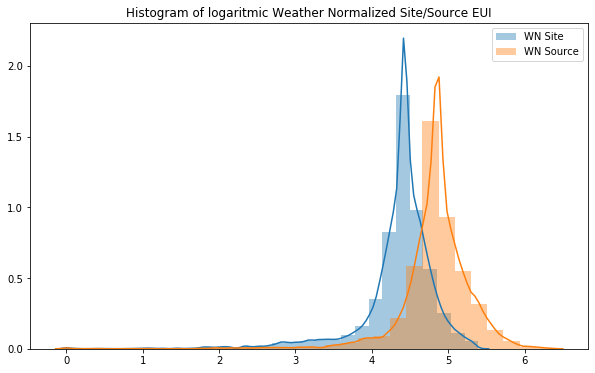

In [667]:
sns.distplot(np.log1p(energy_star['Weather Normalized Site EUI (kBtu/ft²)']), bins=30, label='WN Site')
sns.distplot(np.log1p(energy_star['Weather Normalized Source EUI (kBtu/ft²)']), bins=30, label='WN Source')
plt.title('Histogram of logaritmic Weather Normalized Site/Source EUI', fontsize=12)
plt.xlabel('')
plt.legend()
plt.show()

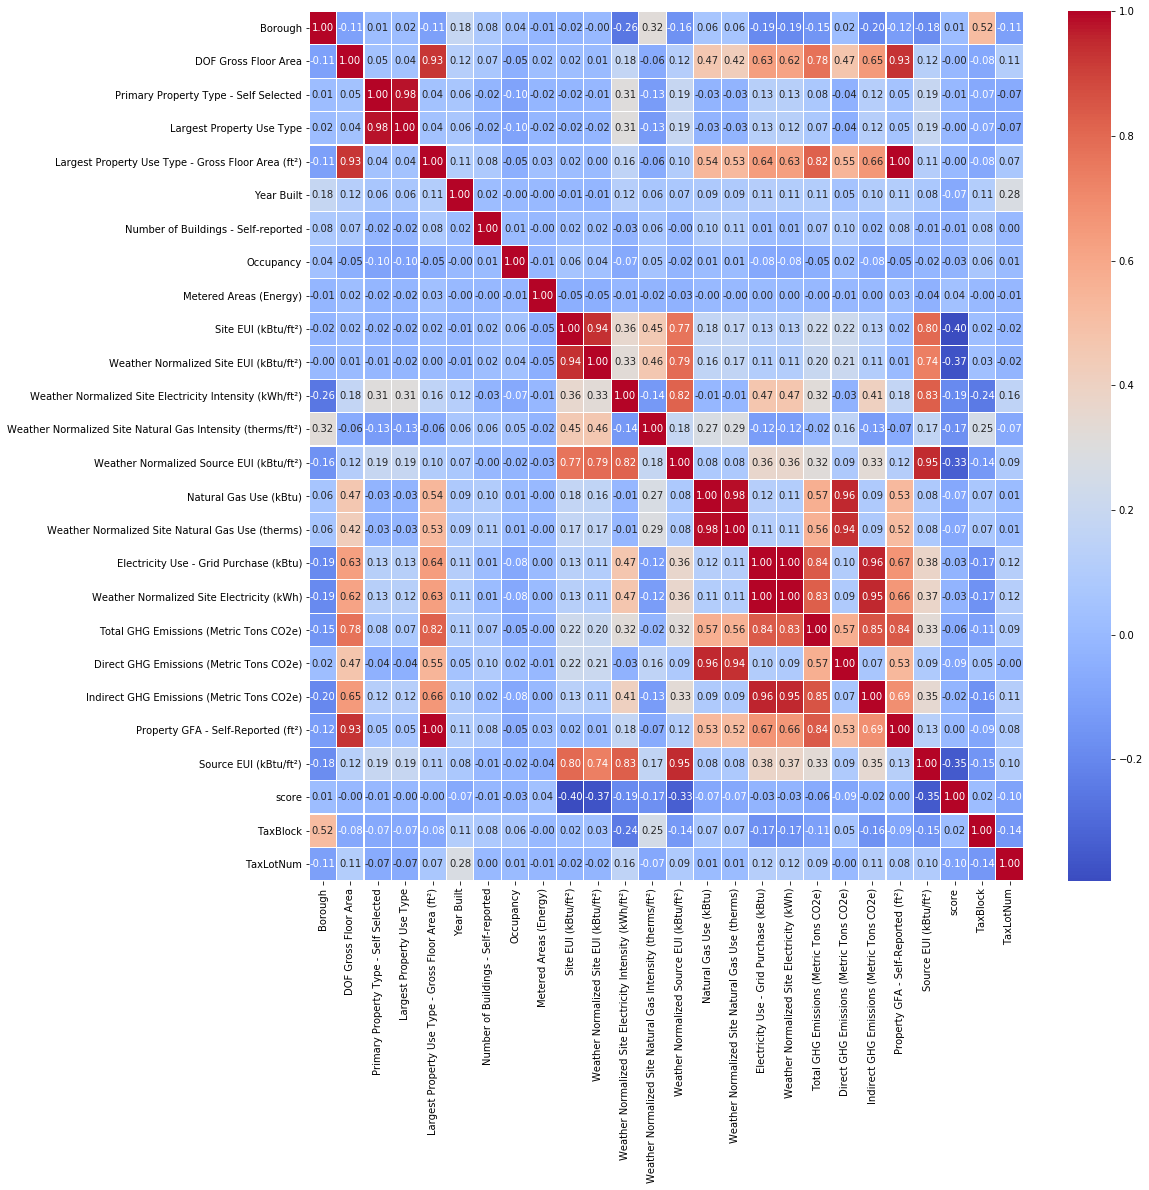

In [661]:
# tabela de correlação
sns.heatmap(energy_star.corr() , annot = True, linewidths = 0.1, 
            square=False, annot_kws = {'size':10}, fmt = '.2f', cmap = 'coolwarm')
fig = plt.gcf()
fig.set_size_inches(16,16)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

A <b>tabela de correlação</b> demonstra o quão relacionada está uma variável com cada uma das outras. Quanto mais próximo de 1 (correlação positiva) e -1 (correlação negativa), mais forte é a associação entre os atributos. Quanto mais próximo de ZERO, menos as variáveis estão correlacionadas.

Ela é positiva quando o valor de uma variável cresce e o valor da outra variável também cresce.<br>
Ela é negativa quando o valor de uma variável cresce e o valor da outra diminui.

Com isso em mente, atributos que possuem uma alta correlação positiva ou negativa (acima de 90%) não são interessantes para a modelagem. Manter apenas uma delas é suficiente pois podemos reduzir a dimensionalidade e aumentar o processamento sem que haja uma perda grande de informação.

In [662]:
# Deletando atributos que possuem alta correlação (maior ou igual a 90%)
# A respeito da Emissão de GHG, optei selecionar o Total e deletar as emissões diretas e indiretas.

high_correlation_cols = ['Largest Property Use Type - Gross Floor Area (ft²)','Site EUI (kBtu/ft²)',
                       'Source EUI (kBtu/ft²)', 'Electricity Use - Grid Purchase (kBtu)', 'DOF Gross Floor Area',
                       'Largest Property Use Type', 'Natural Gas Use (kBtu)','Direct GHG Emissions (Metric Tons CO2e)',
                        'Indirect GHG Emissions (Metric Tons CO2e)']

energy_star.drop(columns=high_correlation_cols, inplace=True)

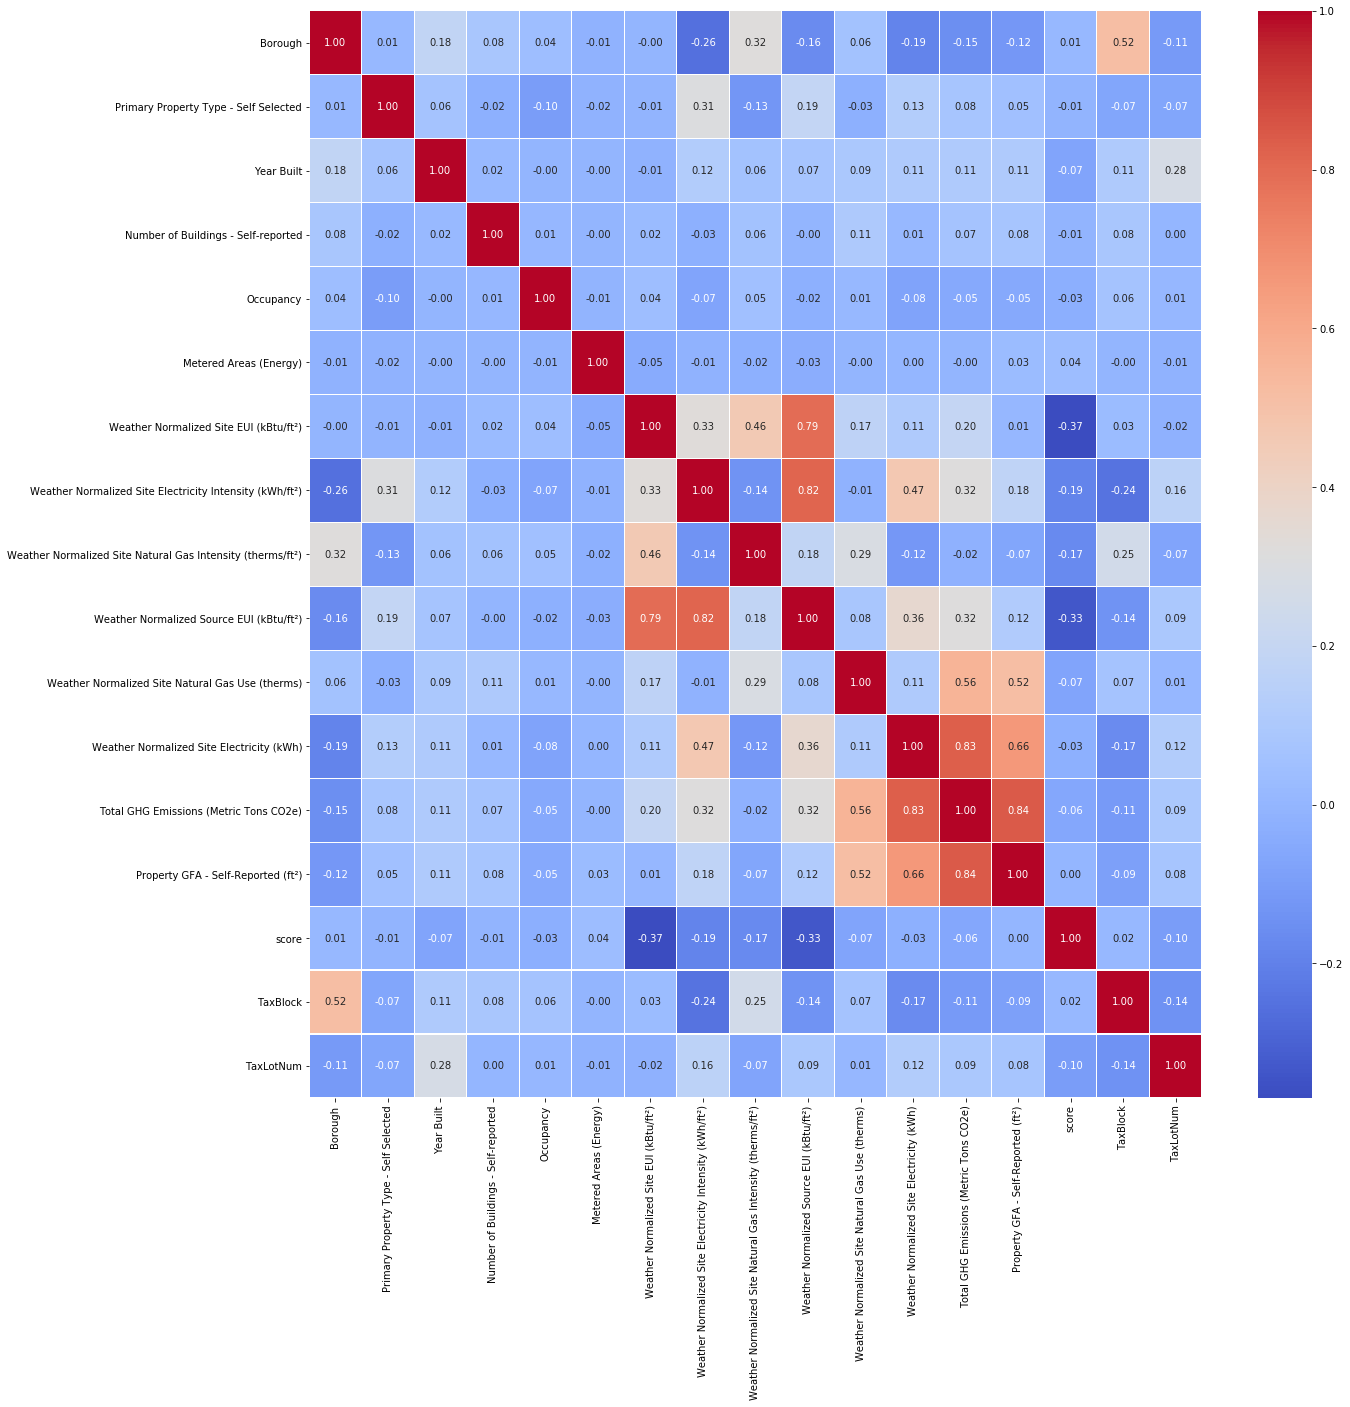

In [663]:
# Verificando a correlação após a exclusão dos atributos com alta correlação

sns.heatmap(energy_star.corr() , annot = True, linewidths = 0.1, annot_kws = {'size':10}, fmt = '.2f', cmap = 'coolwarm')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [664]:
# energy_star.to_csv('energystars.csv', index=0)
energy_star = pd.read_csv('energystars.csv')

> **Normalização dos dados**

In [560]:
# Nomomalização dos dados
es_scaled = (energy_star.drop(columns='score') - energy_star.drop(columns='score').min()) / (energy_star.drop(columns='score').max() - energy_star.drop(columns='score').min())
es_scaled['score'] = energy_star['score']

### **CERTIFICAÇÃO ENERGY STARS DE ACORDO COM SCORE**

De acordo com a [EnergyStars](https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/understand-metrics/how-1-100), o score de eficiência possui três categorias de performance:

* de 0-49: performance ruim (vermelho)
* 50-74: performance média (amarelo)
* 75-100: performance ótima (verde)

Será elegível para a Certificação Energy Stars aquela construção que detiver uma performance VERDE.

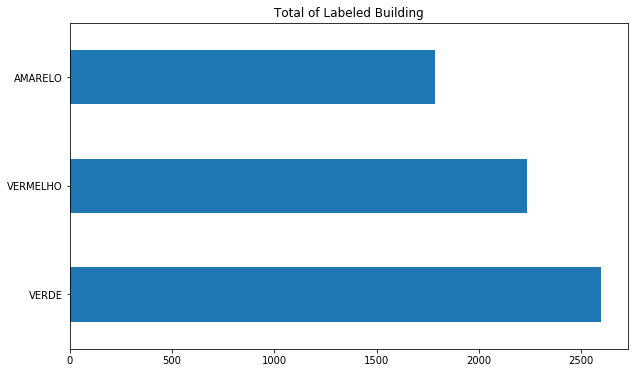

In [677]:
def label(score):
    selo = []
    for i in score:
        if i >= 75:
            selo.append('VERDE')
        elif (i >=50) & (i < 75):
            selo.append('AMARELO')
        else:
            selo.append('VERMELHO')
    return selo

df_labeled = es_scaled.copy()
df_labeled = df_labeled[df_labeled.score != -1]

df_labeled['label'] = label(df_labeled['score'])
df_labeled['grade'] = ['APROVED' if i == 'VERDE' else 'FAILED' for i in df_labeled.label]

df_labeled.label.value_counts().plot.barh()
plt.title('Total of Labeled Building')
plt.show()

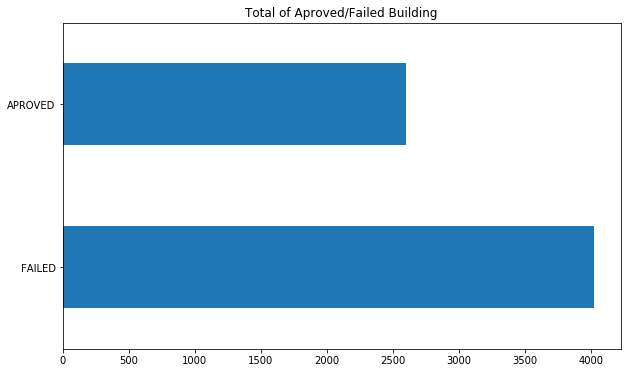

In [675]:
df_labeled.grade.value_counts().plot.barh()
plt.title('Total of Aproved/Failed Building')
plt.show()

### **MODELAGEM PREDITIVA**

Vamos testar alguns modelos para escolher o que retornar o que possui **menor erro absoluto médio** e **maior coeficiente de determinação**.<br>
Serão comparados os modelos REGRESSÃO LINEAR, GRADIENT BOOSTING, KNN e RANDOM FOREST.

> **Divisão dos dados de Teste**<br>
Como determinado no início deste projeto, vamos selecionar os dados de teste aqueles que apresentam o ``['score']`` = -1.<br>
Os dados com ``['score']`` diferente de -1 serão divididos em dados de treino e validação. O objetivo é haver generalização na predição.

In [324]:
# Separação dos dados em treino e teste
data_train = es_scaled[es_scaled.score != -1]
data_test = es_scaled[es_scaled.score == -1].drop(columns='score')

> **Divisão dos dados de Treino e Validação**<br>

In [408]:
# Criação de dados de validação a partir dos dados de treino, para análise da acurácia do
# modelo
X = data_train.drop('score', axis=1)
y = data_train.loc[:,'score']

In [515]:
# Divisão em treino e validação a partir dos dados de treino.
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size = 0.33, random_state=42)

X_test = dados_teste

# Reshape dos scores dos dados de treino e validação
# Transfomar dataframe em array
# y_train = np.array(y_train).reshape((-1, ))
# y_validate = np.array(y_validate).reshape((-1, ))

In [516]:
# proporcionalidade entre a divisão Treino, Validação e Teste
print("Treino: {:.2f}%".format(len(X_train)/len(energy_star)*100))
print('Validação: {:.2f}%:'.format(len(X_validate)/len(energy_star)*100))
print('Teste: {:.2f}%'.format(len(X_test)/len(energy_star)*100))
print('')

# Shape da divisão
print('Treino-Shape:', X_train.shape)
print('Validação-Shape:', X_validate.shape)
print('Teste-Shape:', X_test.shape)

Treino: 56.02%
Validação: 23.11%:
Teste: 29.99%

Treino-Shape: (5298, 16)
Validação-Shape: (2186, 16)
Teste-Shape: (2836, 16)


In [338]:
# Valores com predições negativas serão transformados em ZERO e
# os maiores que 100, em 100.
def turn_zero(pred):
    
    pred_2 = []
    
    for val in pred:
        if val < 0:
            pred_2.append(0)
        elif val > 100:
            pred_2.append(100)
        else:
            pred_2.append(val)
            
    return pred_2

> **MODELO 1: Regressão Linear**<br>

In [339]:
# modelagem REGRESSÃO LINEAR
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

pred_lr = turn_zero(model_lr.predict(X_validate))

mae_lr = mean_absolute_error(y_validate, pred_lr)
r2_lr = r2_score(y_validate, pred_lr)

> **MODELO 2: Gradient Boosting**<br>

In [340]:
# modelagem GRADIENT BOOSTING
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train,y_train)

pred_gb = turn_zero(model_gb.predict(X_validate))

mae_gb = mean_absolute_error(y_validate, pred_gb)
r2_gb = r2_score(y_validate, pred_gb)

> **MODELO 3: K-Nearst-Neighbour**<br>

In [341]:
# modelagem KNN
model_knn = KNeighborsRegressor()
model_knn.fit(X_train,y_train)

pred_knn = turn_zero(model_knn.predict(X_validate))

mae_knn = mean_absolute_error(y_validate, pred_knn)
r2_knn = r2_score(y_validate, pred_knn)

> **MODELO 4: Random Forest**

In [342]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

pred_rf = turn_zero(model_rf.predict(X_validate))

mae_rf = mean_absolute_error(y_validate, pred_rf)
r2_rf = r2_score(y_validate, pred_rf)

### **COMPARAÇÃO ENTRE OS MODELOS**

In [471]:
# Verificando Erro Absoluto Médio (MAE) e o Coeficiente de Determinação (R2) de cada modelo 
dict_rl = {'MAE': mae_lr, 'R2': r2_lr}
dict_gb = {'MAE': mae_gb, 'R2': r2_gb}
dict_knn = {'MAE': mae_knn,'R2': r2_knn}
dict_rf = {'MAE': mae_rf,'R2': r2_rf}

models_metrics = pd.DataFrame([dict_rl,dict_gb, dict_knn, dict_rf], index=['Regressão Linear', 'Gradient Boosting', 'KNN', 'Random Forest'])

models_metrics

,MAE,R2
Regressão Linear,15.788449,0.526519
Gradient Boosting,10.598841,0.753424
KNN,13.331930,0.614934
Random Forest,10.256038,0.758823


Como observado, o modelo **Random Forest** possui os menores erros e maior coeficiente de determinação. Vamos fazer a otimização para tentar diminuir o erro e aumentar o coeficiente de determinação.

### **OTIMIZAÇÃO**

Utilizaremos o **RandomSearchCV**, que usa um conjunto randomizado de combinações dos hiperparâmetros. Nem todos os parâmetros são utilizados, mas sim um número randômico dado pelo parâmetro *n_iter* (número de iterações). Dessa forma nos trará a melhor combinação para otimizar o resultado do modelo selecionado.

In [455]:
# ATENÇÃO: ESTA CÉLULA FOI COMENTADA (#) POIS ELA LEVA UM TEMPO PARA SER RODADA.
# OS MELHORES PARÂMENTROS ENCONTRADOS ESTÃO NA CÉLULA SEGUINTE

## Definindo valores para os hiperparâmetros

param_grid = { 
            "n_estimators"      : [10,20,30, 50, 100, 200],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

# Instanciando o modelo
model = RandomForestRegressor(random_state = 42)

# Aplicando busca randomizada
random_cv = GridSearchCV(estimator=model,
                               param_grid=param_grid,
                               cv=5, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               )

random_cv.fit(X_train, y_train)
random_cv.estimator

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.8min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [456]:
# Melhores parâmetros para o modelo escolhido
random_cv.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 200}

In [ ]:
# Setando hiperparâmetros de acordo com a tunning acima

modelo = RandomForestRegressor(bootstrap= True, max_features = 'auto',
                               min_samples_split= 8, n_estimators= 200)

modelo.fit(X_train,y_train)

# Criando predição dos dados de VALIDAÇÃO
y_pred = modelo.predict(X_validate)

# Verificando erro absoluto médio com os dados de validação
mae_final = mean_absolute_error(y_validate, y_pred)
r2_final = r2_score(y_validate, y_pred)

In [513]:
# Resultados Finais

aumento_r2 = ((r2_final - r2_rf) / r2_rf) * 100
queda_mae = ((mae_final - mae_rf) / mae_rf) * 100

print('MAE FINAL de', mae_final.round(3), "uma queda de {:.2f}% comparado com o MAE inicial de {}.".format(queda_mae, mae_rf.round(3)))
print('R² FINAL de', r2_final.round(3),'um aumento de {:.2f}% comparado com o R² inicial de {}.'.format(aumento_r2, r2_rf.round(3)))

MAE FINAL de 8.32 uma queda de -18.88% comparado com o MAE inicial de 10.256.
R² FINAL de 0.836 um aumento de 10.12% comparado com o R² inicial de 0.759.


### **Predição** com os dados de TESTE

Vamos realizar a predição da eficiência energética (score) de novas construções e ver quais teriam a probabilidade de recebe o certificado Energy Stars.

Para obter o certificado, é necessário obter um score a partir de 75 pontos (selo TOP)

In [702]:
## Prevendo ENERGY SCORE para os dados de teste
## Os dados de teste já foram normalizados quando da separação dos dados de treino

# Resultado do modelo
predictions = np.round(modelo.predict(X_test)).astype(int)
predictions[predictions > 100] = 100
predictions[predictions < 1] = 1

# Resultado da Predição
result = pd.DataFrame({'Property Id': ids_test, 'score': predictions }).reset_index().drop(columns='index')

# Nota para obter o certificado
result['label'] = label(result['score'])
result['grade'] = ['APROVED' if i == 'VERDE' else 'FAILED' for i in result.label]

result.head(100)

,Property Id,score,label,grade
0,2637863,60,AMARELO,FAILED
1,4988569,82,VERDE,APROVED
2,3129181,75,VERDE,APROVED
3,3129231,29,VERMELHO,FAILED
4,2658438,100,VERDE,APROVED
...,...,...,...,...
95,2812116,81,VERDE,APROVED
96,1557451,82,VERDE,APROVED
97,3129002,3,VERMELHO,FAILED
98,4136381,56,AMARELO,FAILED


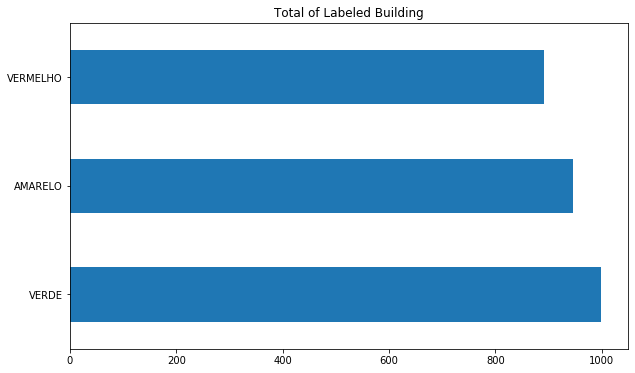

In [706]:
# Vamos plotar um gráfico de barras com a quantidade de construções pelos scores
# Além disso, vamos mostrar a classificação de Aprovação ou Reprovação para receber o certificado Energy Stars.

result.label.value_counts().plot.barh()
plt.title('Total of Labeled Building')
plt.show()

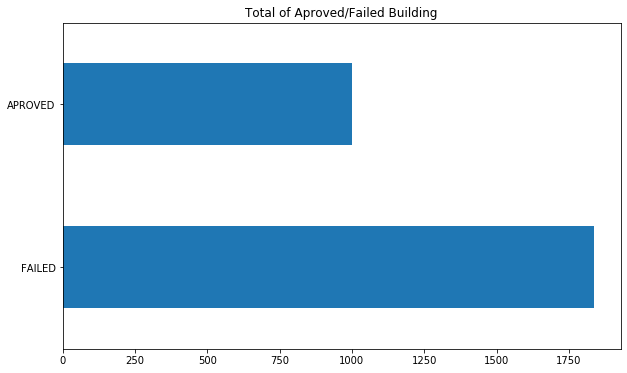

In [707]:
result.grade.value_counts().plot.barh()
plt.title('Total of Aproved/Failed Building')
plt.show()

Obrigado!<br>
**Paulo P Lima**<br>

LinkedIn: www.linkedin.com/in/dspaulolima<br>
Github: www.github.com/dspaulolima<br>